In [ ]:
import numpy as np
import pandas as pd

In [6]:
query_df = pd.read_csv('/content/QueryResults (2).csv', names=['DATE', 'TAG', 'POSTS'], header=0)
query_df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


In [7]:
query_df.tail()

,DATE,TAG,POSTS
2435,2023-03-01 00:00:00,php,2451
2436,2023-03-01 00:00:00,python,16229
2437,2023-03-01 00:00:00,r,3885
2438,2023-03-01 00:00:00,ruby,309
2439,2023-03-01 00:00:00,swift,1417


In [8]:
query_df.shape

(2440, 3)

In [9]:
query_df.isnull().sum()

DATE     0
TAG      0
POSTS    0
dtype: int64

In [10]:
query_df.groupby('TAG').sum()

<ipython-input-10-053bef0e3326>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  query_df.groupby('TAG').sum()


,POSTS
TAG,
assembly,42447
c,394476
c#,1585612
c++,790723
delphi,50708
go,68341
java,1890577
javascript,2482712
perl,67604


In [11]:
query_df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,176,176
c,176,176
c#,177,177
c++,176,176
delphi,176,176
go,161,161
java,176,176
javascript,176,176
perl,176,176


In [13]:
type(query_df['DATE'][1])

str

In [14]:
query_df.DATE = pd.to_datetime(query_df.DATE)
query_df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


In [15]:
import matplotlib.pyplot as plt

In [17]:
query_df = query_df.pivot(index='DATE', columns='TAG', values='POSTS')
query_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1642.0,754.0,104.0,NaN,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1730.0,734.0,141.0,NaN,956.0,580.0,97.0,500.0,450.0,1.0,158.0,NaN


In [18]:
query_df.isnull().sum()

TAG
assembly       1
c              1
c#             0
c++            1
delphi         1
go            16
java           1
javascript     1
perl           1
php            1
python         1
r              3
ruby           1
swift          9
dtype: int64

In [19]:
query_df = query_df.fillna(0)

In [20]:
query_df.isnull().sum()

TAG
assembly      0
c             0
c#            0
c++           0
delphi        0
go            0
java          0
javascript    0
perl          0
php           0
python        0
r             0
ruby          0
swift         0
dtype: int64

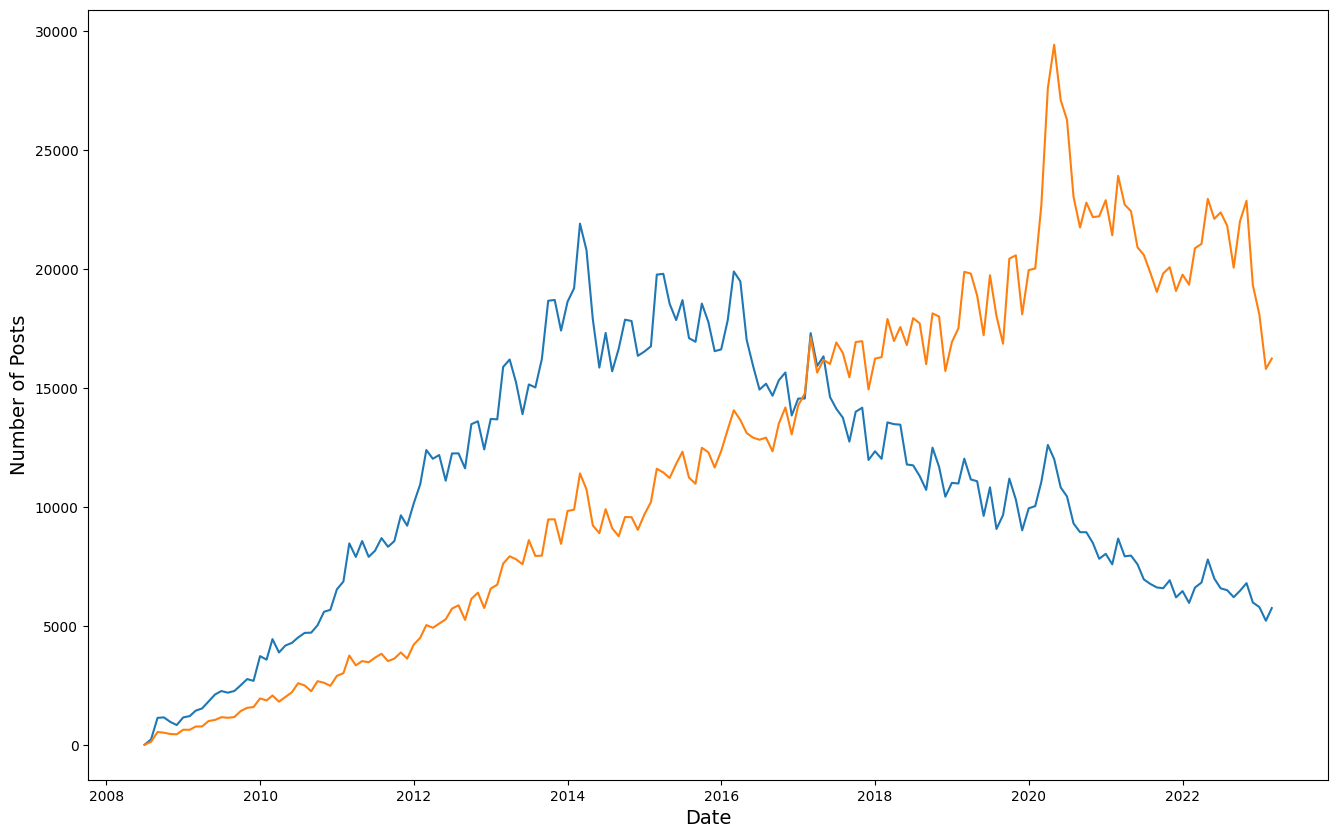

In [30]:
plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.plot(query_df.index, query_df.java)
plt.plot(query_df.index, query_df.python, label=query_df.python.name)

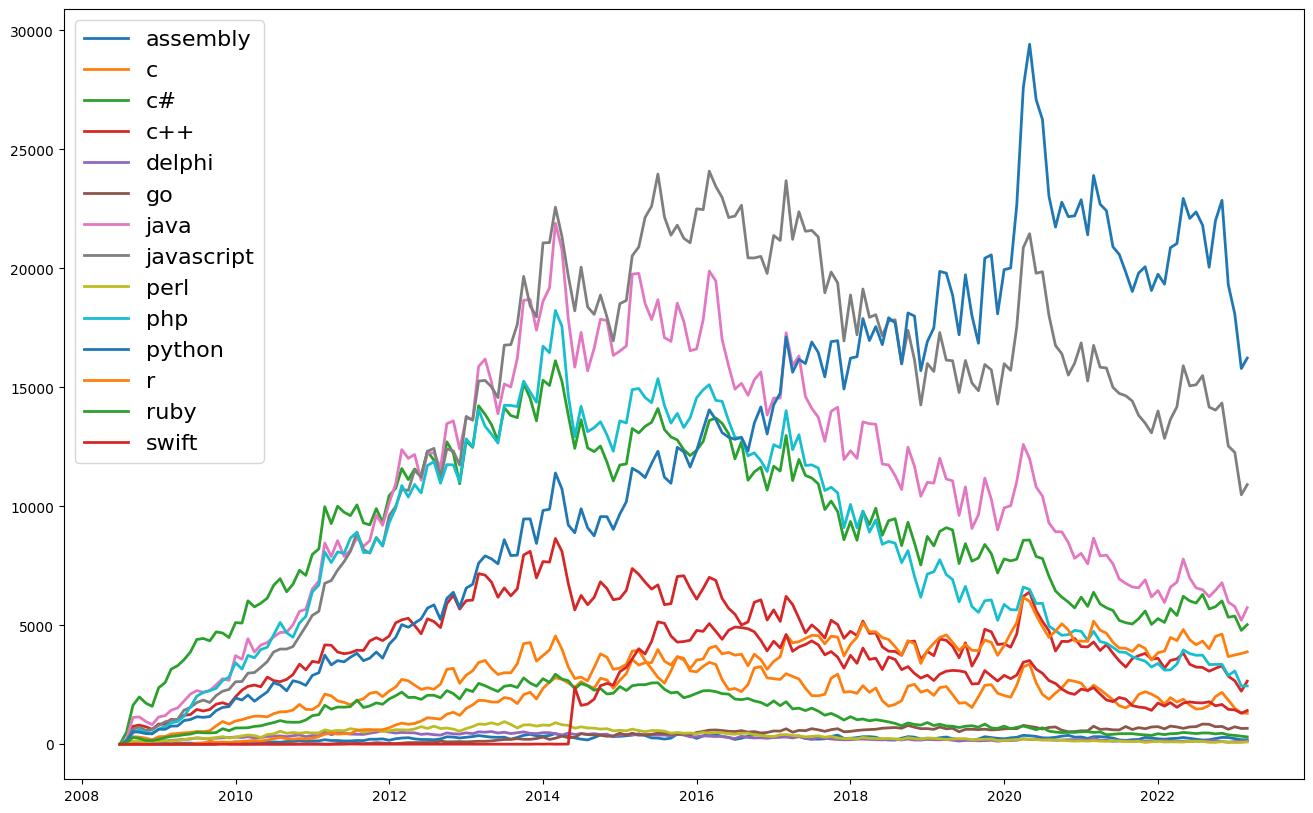

In [31]:
plt.figure(figsize=(16,10))
for column in query_df.columns:
  plt.plot(query_df.index, query_df[column], linewidth=2, label=query_df[column].name)
plt.legend(fontsize=16)

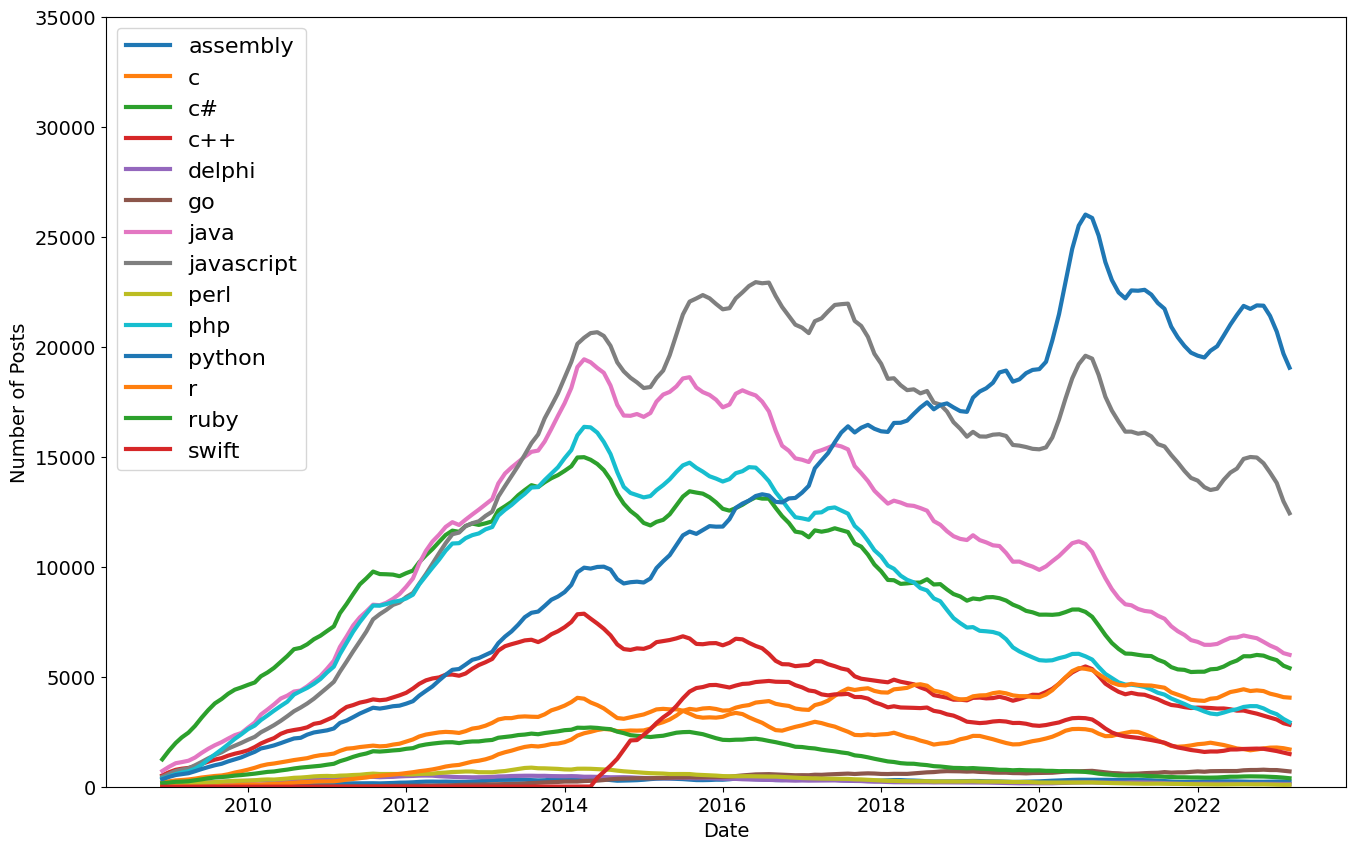

In [33]:
roll_df = query_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)